In [186]:
## Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Alghorithms
from sklearn.cluster import KMeans
## other
import os

In [187]:
## Read the csv file using pandas
df = pd.read_csv(r'D:\unsupervised-practice\04- Group Segmentation\LoanStats3a.csv')

## show the head of the DF
df.head(30)

C:\Users\gamma\AppData\Local\Temp\ipykernel_2688\2706008140.py:2: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\unsupervised-practice\04- Group Segmentation\LoanStats3a.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,5000.0,5000.0,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,7000.0,7000.0,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,3000.0,3000.0,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,5600.0,5600.0,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,5375.0,5375.0,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df.shape

(42542, 145)

In [189]:
## check the info (nulls and datatypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 145 entries, id to settlement_term
dtypes: float64(115), object(30)
memory usage: 47.1+ MB


In [190]:
## some statistics of the DF 
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,0.0,42535.000000,42506.000000,42506.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,NaN,13.373043,0.152449,1.081424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.137875,49.905875,1.200000
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,NaN,6.726315,0.512406,1.527455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.373774,15.563690,4.085255
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,NaN,8.200000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842.750000,40.000000,0.000000
50%,NaN,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,NaN,13.470000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.350000,49.970000,0.000000
75%,NaN,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,NaN,18.680000,0.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5701.100000,60.652500,0.000000
max,NaN,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,NaN,29.990000,13.000000,33.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14798.200000,92.740000,24.000000


In [191]:
## check the nulls
df.isna().sum()

id                       42539
member_id                42542
loan_amnt                    7
funded_amnt                  7
funded_amnt_inv              7
                         ...  
settlement_status        42382
settlement_date          42382
settlement_amount        42382
settlement_percentage    42382
settlement_term          42382
Length: 145, dtype: int64

In [218]:
relevant_cols = ['loan_amnt', 'installment', 'int_rate', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'addr_state']

df_relevant = df[relevant_cols]
df_relevant

,loan_amnt,installment,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,addr_state
0,5000.0,162.87,10.65%,B,B2,RENT,24000.0,Verified,credit_card,AZ
1,2500.0,59.83,15.27%,C,C4,RENT,30000.0,Source Verified,car,GA
2,2400.0,84.33,15.96%,C,C5,RENT,12252.0,Not Verified,small_business,IL
3,10000.0,339.31,13.49%,C,C1,RENT,49200.0,Source Verified,other,CA
4,3000.0,67.79,12.69%,B,B5,RENT,80000.0,Source Verified,other,OR
...,...,...,...,...,...,...,...,...,...,...
42532,6500.0,208.66,9.64%,B,B4,RENT,20000.0,Not Verified,other,CT
42533,3500.0,113.39,10.28%,C,C1,RENT,180000.0,Not Verified,other,NY
42534,1000.0,32.11,9.64%,B,B4,RENT,12000.0,Not Verified,other,MA
42535,2525.0,80.69,9.33%,B,B3,RENT,110000.0,Not Verified,other,NY


In [210]:
df_relevant.shape

(42542, 12)

In [211]:
df_relevant.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc
count,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04
mean,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04
std,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04
min,500.000000,500.000000,0.000000,15.670000,1.896000e+03
25%,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04
50%,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04
75%,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06


In [212]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            42535 non-null  float64
 1   funded_amnt          42535 non-null  float64
 2   funded_amnt_inv      42535 non-null  float64
 3   installment          42535 non-null  float64
 4   int_rate             42535 non-null  object 
 5   grade                42535 non-null  object 
 6   sub_grade            42535 non-null  object 
 7   home_ownership       42535 non-null  object 
 8   annual_inc           42531 non-null  float64
 9   verification_status  42535 non-null  object 
 10  purpose              42535 non-null  object 
 11  addr_state           42535 non-null  object 
dtypes: float64(5), object(7)
memory usage: 3.9+ MB


In [213]:
df_relevant.isna().sum()

loan_amnt               7
funded_amnt             7
funded_amnt_inv         7
installment             7
int_rate                7
grade                   7
sub_grade               7
home_ownership          7
annual_inc             11
verification_status     7
purpose                 7
addr_state              7
dtype: int64

In [215]:
df= df_relevant.dropna()
df.isna().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
installment            0
int_rate               0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
addr_state             0
dtype: int64

In [222]:
X = df.iloc[:, [0, 1]].values ## features
X 

array([[5000., 5000.],
       [2500., 2500.],
       [2400., 2400.],
       ...,
       [1000., 1000.],
       [2525., 2525.],
       [5000., 5000.]])

In [223]:
X.shape

(42531, 2)

## Using the Elbow method to find the optimal number of clusters

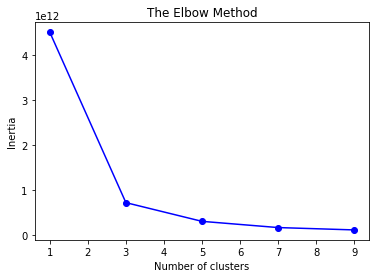

In [224]:
inertia = []
for k in range(1, 10, 2):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

##ploting
plt.plot(range(1, 10, 2), inertia, 'bo-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Training the K-Means model on the dataset

In [225]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=50)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=50)

In [226]:
y_pred = kmeans.predict(X) #---> = kmeans.labels_
np.unique(y_pred)

array([0, 1, 2])

In [227]:
## kmeans.predict(X) = kmeans.labels_
np.allclose(y_pred, kmeans.labels_)

True

In [228]:
cenroids = kmeans.cluster_centers_
cenroids 

array([[ 5137.04294324,  5087.66449021],
       [24566.66914941, 23717.69700581],
       [12854.00898919, 12557.11905959]])

## Visualising the clusters

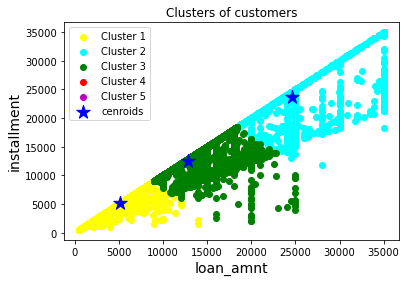

In [229]:
### Plotting
plt.figure(figsize=(6, 4))

plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='yellow', label = 'Cluster 1')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='cyan', label = 'Cluster 2')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], c='g', label = 'Cluster 3')
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], c='r', label = 'Cluster 4')
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], c='m', label = 'Cluster 5')

plt.scatter(cenroids[:, 0], cenroids[:, 1], s=200, marker='*', c='b', label='cenroids')

plt.title('Clusters of customers')
plt.xlabel('loan_amnt', fontsize=14)
plt.ylabel('installment', fontsize=14)
plt.legend()
plt.show()